<a href="https://colab.research.google.com/github/sabrinabms/mpcaRNA_perfil/blob/generalizacao/visualizacao_perfil_temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MPCA & RNA
### Perfil de temperatura - *EngOpt2012*

Os arquivos usados estão no diretório: 
workDir= '/Users/sabrinabms/Documents/INPE/doutorado/ENGOPT2012-experimento/PlotarGraficos/'

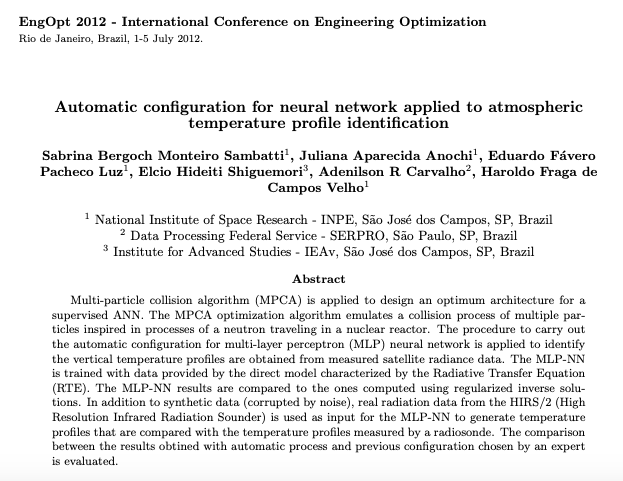

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from math import *
from google.colab import files

Carregando os arquivos

In [11]:
uploaded = files.upload()

Saving tikhonov1.txt to tikhonov1.txt
Saving saida_gen.txt to saida_gen.txt
Saving radiossondagem.txt to radiossondagem.txt
Saving entropia2.txt to entropia2.txt


In [13]:
radio = pd.read_csv('radiossondagem.txt', "r", header=None, delimiter=r"\s+") 

In [14]:
tiko = pd.read_csv('tikhonov1.txt', "r", header=None, delimiter=r"\s+") 

In [15]:
entropia = pd.read_csv('entropia2.txt', "r", header=None, delimiter=r"\s+") 

In [17]:
saida_gen = pd.read_csv('saida_gen.txt', "r", header=None, delimiter=r"\s+") 

Verificando o tamanho e conteudo dos arquivos

In [36]:
radio.shape,  saida_gen.shape, tiko.shape, entropia.shape

((486, 2), (40, 346), (40, 3), (40, 3))

In [35]:
radio.head(5)

,0,1
0,223.549994,16.9
1,223.549994,17.1
2,223.749994,17.2
3,223.849994,17.4
4,223.949994,17.6


In [23]:
saida_gen.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345
0,0.304027,0.291437,0.293909,0.289291,0.300361,0.298705,0.297430,0.301330,0.292973,0.286236,0.296637,0.306068,0.291623,0.293086,0.298675,0.299664,0.298905,0.285088,0.299965,0.305369,0.290906,0.295636,0.293680,0.293427,0.299785,0.289515,0.287911,0.285648,0.286213,0.295506,0.290224,0.300518,0.290914,0.294567,0.300301,0.291496,0.295188,0.294137,0.286818,0.282767,...,0.314686,0.295842,0.288693,0.304017,0.273909,0.292548,0.290810,0.295807,0.294066,0.302480,0.301273,0.290749,0.285694,0.302818,0.294055,0.287955,0.307863,0.293972,0.284915,0.283811,0.281551,0.284819,0.276780,0.287972,0.289507,0.282119,0.281252,0.273089,0.291335,0.290632,0.277867,0.274520,0.278394,0.277021,0.286827,0.281719,0.293610,0.274934,0.275828,0.286806
1,0.341333,0.326345,0.329291,0.323789,0.336973,0.335001,0.333484,0.338125,0.328176,0.320146,0.332540,0.343760,0.326567,0.328311,0.334966,0.336143,0.335240,0.318778,0.336501,0.342928,0.325713,0.331347,0.329018,0.328717,0.336287,0.324056,0.322143,0.319446,0.320118,0.331193,0.324900,0.337159,0.325722,0.330075,0.336901,0.326416,0.330814,0.329562,0.320841,0.316009,...,0.353997,0.331593,0.323076,0.341321,0.305438,0.327669,0.325598,0.331551,0.329478,0.339493,0.338057,0.325526,0.319500,0.339895,0.329465,0.322195,0.345894,0.329366,0.318572,0.317255,0.314559,0.318456,0.308865,0.322217,0.324046,0.315236,0.314202,0.304459,0.326224,0.325386,0.310163,0.306168,0.310792,0.309153,0.320851,0.314759,0.328934,0.306662,0.307729,0.320826
2,0.385432,0.366274,0.370042,0.363002,0.379863,0.377343,0.375404,0.381335,0.368616,0.358340,0.374197,0.388531,0.366558,0.368789,0.377298,0.378802,0.377648,0.356588,0.379260,0.387469,0.365465,0.372672,0.369693,0.369308,0.378987,0.363344,0.360896,0.357443,0.358305,0.372474,0.364425,0.380101,0.365477,0.371045,0.379771,0.366364,0.371990,0.370390,0.359229,0.353044,...,0.401581,0.372987,0.362090,0.385417,0.339504,0.367968,0.365318,0.372933,0.370281,0.383082,0.381248,0.365226,0.357513,0.383596,0.370265,0.360963,0.391253,0.370138,0.356324,0.354638,0.351186,0.356176,0.343894,0.360991,0.363332,0.352054,0.350729,0.338250,0.366119,0.365047,0.345556,0.340439,0.346362,0.344262,0.359243,0.351442,0.369586,0.341072,0.342438,0.359210
3,0.395723,0.369074,0.374302,0.364542,0.387959,0.384451,0.381753,0.390011,0.372322,0.358094,0.380075,0.400047,0.369467,0.372562,0.384388,0.386482,0.384875,0.355674,0.387119,0.398565,0.367953,0.377955,0.373817,0.373283,0.386739,0.365015,0.361627,0.356855,0.358045,0.377680,0.366511,0.388291,0.367969,0.375694,0.387831,0.369199,0.377007,0.374784,0.359322,0.350786,...,0.418288,0.378392,0.363279,0.395701,0.332202,0.371422,0.367749,0.378317,0.374634,0.392446,0.389889,0.367621,0.356952,0.393162,0.374611,0.361720,0.403848,0.374435,0.355311,0.352984,0.348229,0.355106,0.338211,0.361758,0.364998,0.349423,0.347600,0.330488,0.368860,0.367373,0.340490,0.333480,0.341597,0.338716,0.359341,0.348581,0.373669,0.334346,0.336216,0.359296
4,0.392601,0.363256,0.369003,0.358277,0.384041,0.380174,0.377203,0.386302,0.366826,0.351202,0.375355,0.397373,0.363688,0.367090,0.380105,0.382412,0.380642,0.348549,0.383115,0.395737,0.362024,0.373022,0.368469,0.367882,0.382695,0.358797,0.355078,0.349844,0.351148,0.372720,0.360440,0.384406,0.362042,0.370535,0.383899,0.363393,0.371979,0.369534,0.352549,0.343194,...,0.417525,0.373503,0.356891,0.392577,0.322887,0.365837,0.361800,0.373421,0.369368,0.388986,0.386167,0.361659,0.349950,0.389777,0.369344,0.355180,0.401570,0.369149,0.348151,0.345601,0.340394,0.347927,0.329443,0.355221,0.358778,0.341701,0.339706,0.321019,0.363020,0.361387,0.331933,0.324281,0.333142,0.329995,0.352570,0.340780,0.368307,0.325225,0.327266,0.352521


In [20]:
radio_s = radio.to_numpy()
tiko_s = tiko.to_numpy()
entropia_s = entropia.to_numpy()
saida_gen_s = saida_gen.to_numpy()

Os valores abaixo são usados no processo de normalização dos dados


In [25]:
maximo = 291.270
maximo_radiancia = 343.1120
minimo = 147.2700
minimo_radiancia = 8.6090

In [26]:
y2 = saida_gen_s*maximo
y2 = y2 + minimo

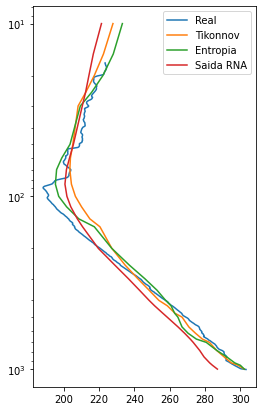

In [33]:
plt.subplots(figsize=(4,7))
plt.plot(radio_s[:,0],radio_s[:,1], label= 'Real')
plt.plot(tiko_s[10:,0],tiko_s[10:,1], label = 'Tikhonov')
plt.plot(entropia_s[10:,0],entropia_s[10:,1], label = 'Entropia')
plt.plot(y2[10:,1],entropia_s[10:,1], label = 'Saida RNA')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.legend()
plt.show()